### Vehicle Loan Default Prediction
Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.<br>

A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided in the datasets:<br>

* Loanee Information (Demographic data like age, income, Identity proof etc.)
* Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
* Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)<br>

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

In [78]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [67]:
Target = 'loan_default'
ID = 'UniqueID'

In [24]:
train = pd.read_csv('./train/train.csv',index_col=False)
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [9]:
print('Total No. of columns:',len(train.columns))
print('The Columns name are:')
print(list(train.columns))

Total No. of columns: 41
The Columns name are:
['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default']


In [5]:
#To check whether any duplicate UniqueID exists or not
assert len(train.UniqueID.unique()) == train.UniqueID.shape[0]
print("No duplicate uniqueId Exists")

No duplicate uniqueId Exists


In [19]:
print("Missing Value Check:")
print(train.notnull().sum(axis=0))

Missing Value Check:
UniqueID                               233154
disbursed_amount                       233154
asset_cost                             233154
ltv                                    233154
branch_id                              233154
supplier_id                            233154
manufacturer_id                        233154
Current_pincode_ID                     233154
Date.of.Birth                          233154
Employment.Type                        225493
DisbursalDate                          233154
State_ID                               233154
Employee_code_ID                       233154
MobileNo_Avl_Flag                      233154
Aadhar_flag                            233154
PAN_flag                               233154
VoterID_flag                           233154
Driving_flag                           233154
Passport_flag                          233154
PERFORM_CNS.SCORE                      233154
PERFORM_CNS.SCORE.DESCRIPTION          233154
PRI.NO.OF.ACC

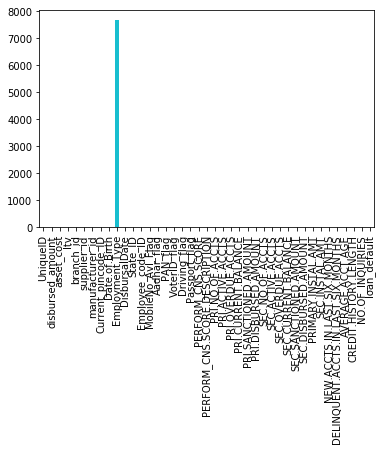

In [23]:
train.isnull().sum(axis=0).plot(kind='bar')

In [58]:
float_column = list(train.select_dtypes(include='float64').columns)

In [60]:
categorical_column = list(train.select_dtypes(include='object').columns)

In [69]:
numerical_column = list(train.select_dtypes(include='int64').columns)
numerical_column = [ i for i in numerical_column if i not in [Target,ID]]

In [70]:
numerical_column

['disbursed_amount',
 'asset_cost',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES']

In [25]:
column_definition = pd.read_excel('./train/Data Dictionary.xlsx',index_col=False)

In [79]:
column_definition

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [80]:
# Unbalance 
train.loan_default.value_counts(normalize=True)*100

#Comment: Data is not heavily unbalanced

0    78.292888
1    21.707112
Name: loan_default, dtype: float64

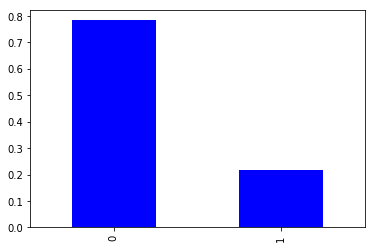

In [36]:
train['loan_default'].value_counts(normalize=True).plot(kind='bar',figsize=(6,4),color='blue')

In [71]:
train[numerical_column]

,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,50578,58400,67,22807,45,1441,6,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,67,22807,45,1502,6,1998,1,1,...,0,0,0,0,0,1991,0,0,1,0
2,53278,61360,67,22807,45,1497,6,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,67,22807,45,1501,6,1998,1,1,...,0,0,0,0,0,31,0,0,0,1
4,52378,60300,67,22807,45,1495,6,1998,1,1,...,0,0,0,0,0,0,0,0,0,1
5,54513,61900,67,22807,45,1501,6,1998,1,1,...,0,0,0,0,0,1347,0,0,0,0
6,46349,61500,67,22807,45,1502,6,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
7,43894,61900,67,22807,45,1501,6,1998,1,1,...,0,0,0,0,0,0,0,0,0,0
8,53713,61973,67,22807,45,1497,6,1998,1,1,...,0,0,0,0,0,0,0,0,0,1
9,52603,61300,67,22807,45,1492,6,1998,1,0,...,0,0,0,0,0,2608,0,0,0,0


In [81]:
train['disbursed_amount'].corr(train['asset_cost'])

0.75266830990674

In [83]:
train[numerical_column].corr()

,disbursed_amount,asset_cost,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
disbursed_amount,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
asset_cost,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
branch_id,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
supplier_id,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
manufacturer_id,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Current_pincode_ID,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
State_ID,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Employee_code_ID,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MobileNo_Avl_Flag,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Aadhar_flag,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default']

In [84]:
categorical_features = ['branch_id','supplier_id']

In [91]:
train['branch_id'].value_counts()

2      13138
67     11328
3       9230
5       9218
36      8832
136     7833
34      7794
16      6466
19      5860
1       5709
146     5376
18      5032
152     4933
61      4906
48      4725
11      4506
20      4431
138     4352
74      4297
120     4210
147     4160
10      4125
103     3878
251     3844
65      3509
160     3505
79      3413
7       3222
135     3203
8       3146
       ...  
77      1445
72      1294
257     1256
17      1160
130     1069
82      1035
165     1021
121      884
249      858
76       855
69       810
35       693
153      692
62       691
207      689
43       584
117      558
142      473
97       389
258      374
260      372
101      368
259      346
100      331
66       314
217      183
261      176
84       156
111       89
158       69
Name: branch_id, Length: 82, dtype: int64

In [88]:
train[float_column]

,ltv
0,89.55
1,73.23
2,89.63
3,88.48
4,88.39
5,89.66
6,76.42
7,71.89
8,89.56
9,86.95
